# Alzheimer Classification

Dataset: DARWIN, https://archive.ics.uci.edu/dataset/732/darwin 

The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.

N. D. Cilia, C. De Stefano, F. Fontanella, A. S. Di Freca, An experimental protocol to support cognitive impairment diagnosis by using handwriting analysis, Procedia Computer Science 141 (2018) 466–471. https://doi.org/10.1016/j.procs.2018.10.141

N. D. Cilia, G. De Gregorio, C. De Stefano, F. Fontanella, A. Marcelli, A. Parziale, Diagnosing Alzheimer’s disease from online handwriting: A novel dataset and performance benchmarking, Engineering Applications of Artificial Intelligence, Vol. 111 (20229) 104822. https://doi.org/10.1016/j.engappai.2022.104822

## Data Pre-processing

In [1]:
path = "data.csv" ## Save the csv file in the same directory with this file

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(path)
df

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,id_170,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,id_171,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,id_172,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,id_173,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


In [4]:
df.shape

(174, 452)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [6]:
df = df.drop(columns='ID')
df["class"] = df["class"].replace({'P': 1, 'H': 0})
df

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,1
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,1
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,1
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,1
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,0.032691,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,0
170,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,0.032059,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,0
171,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,0.022705,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,0
172,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,0.090686,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,0


In [7]:
df.describe()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000
mean,5664.166667,0.000010,297.666685,200.504413,1977.965517,7323.896552,0.416374,0.179823,249.085549,0.067556,...,0.148286,0.019934,4.472643,2.871613,85.839080,43109.712644,1629.585962,163061.767360,1.642033e+05,0.511494
std,12653.772746,0.000003,183.943181,111.629546,1648.306365,2188.290512,0.381837,0.064693,132.698462,0.074776,...,0.062207,0.002388,1.501411,0.852809,27.485518,19092.024337,324.142316,56845.610814,4.969397e+05,0.501310
min,65.000000,0.000002,28.734515,29.935835,754.000000,561.000000,0.067748,0.096631,41.199445,0.011861,...,0.030169,0.014987,1.323565,0.950249,32.000000,15930.000000,474.049462,26984.926660,2.998000e+04,0.000000
25%,1697.500000,0.000008,174.153023,136.524742,1362.500000,6124.000000,0.218209,0.146647,161.136182,0.029523,...,0.107732,0.018301,3.485934,2.401199,66.000000,32803.750000,1499.112088,120099.046800,5.917500e+04,0.000000
50%,2890.000000,0.000009,255.791452,176.494494,1681.000000,6975.500000,0.275184,0.163659,224.445268,0.039233,...,0.140483,0.019488,4.510578,2.830672,81.000000,37312.500000,1729.385010,158236.771800,7.611500e+04,1.000000
75%,4931.250000,0.000011,358.917885,234.052560,2082.750000,8298.500000,0.442706,0.188879,294.392298,0.071057,...,0.199168,0.021134,5.212794,3.335828,101.500000,46533.750000,1865.626974,200921.078475,1.275425e+05,1.000000
max,109965.000000,0.000028,1168.328276,865.210522,18602.000000,15783.000000,2.772566,0.627350,836.784702,0.543199,...,0.375078,0.029227,10.416715,5.602909,209.000000,139575.000000,1999.775983,352981.850000,5.704200e+06,1.000000


In [8]:
null_val_count = df.isnull().sum()
print("Number of null values in the dataset  :", null_val_count[null_val_count > 0])

duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of null values in the dataset  : Series([], dtype: int64)
Number of duplicate rows: 0


As stated in the dataset description, there are no null values found in the dataset (at least no numpy NaN is present).

However, there are 450 features in this dataset, and it is not impossible but is clearly ineffective to look over each column and intuitively figure out which value for which column will be an invalid one.

Hence, we could perform feature engineering and dimensionality reduction; I'll find a few features that are highly relevant to distinguishing the class, and train our models with the few selected features.

## 1. PCA

Let us first capture the overall pattern of the data using PCA. We must see if the variance of the data can be explained with the features that we have.

In [9]:
X = df.drop(columns='class')
y = df['class']

print(X.shape)
print(y.shape)

(174, 450)
(174,)


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler(with_mean=True, with_std=True)
X_std = scaler.fit_transform(X)

Standardization is **CRUCIAL** prior to PCA!

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.91498921 0.05472428]
0.9697134845486033


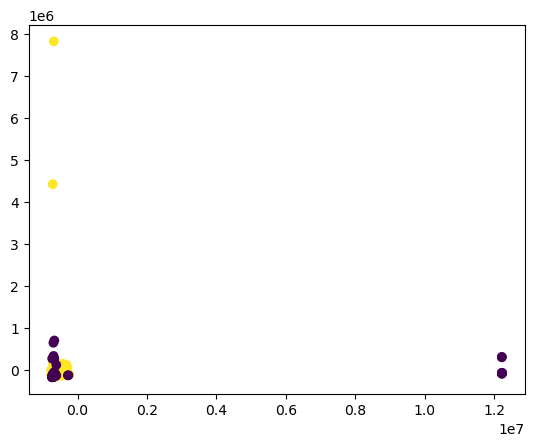

In [12]:
import matplotlib.pyplot as plt

plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

Reflection: Not a great visualization of the dataset achieved with PCA; PC2 accounts for too little variance to capture the distribution pattern.

## 2. Baseline Model

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(121, 450)
(53, 450)


In [14]:
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [15]:
pd.DataFrame(data=X_train_std) # sklearn got rid of the column names, so we'll add them back in

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,0.012151,0.737714,-0.540456,0.160704,-0.322440,1.573250,-0.087181,0.375875,-0.305572,-0.161374,...,-0.552768,-0.965185,2.590149,-1.029957,0.282509,-0.218471,-1.083533,0.371365,1.487859,-0.186534
1,0.644022,2.349213,-0.870800,-1.377939,-0.371477,1.022621,-0.256597,-0.130789,-1.176853,-0.402965,...,0.101766,0.948219,-0.244006,0.463495,-0.000791,-0.141848,-0.534380,-0.189309,0.039800,-0.150482
2,1.738095,-2.272238,-1.649120,-0.862042,-0.380005,-2.921776,-0.626658,-1.055690,-1.497955,-0.532946,...,0.668289,0.916843,-0.453917,0.224183,0.580837,-0.946393,-0.372308,0.909899,-1.261057,-0.213823
3,-0.088146,0.136816,-1.075768,-1.185275,-0.532979,-0.896690,-0.448848,0.182950,-1.237660,-0.586175,...,0.745476,0.494780,1.490041,0.400313,1.801949,-1.176263,-0.664150,0.964560,-0.957717,-0.213976
4,-0.283725,-0.403992,1.237209,-0.179710,-0.273403,0.129075,1.717365,-0.617697,0.778202,1.796212,...,-0.287381,0.546207,0.305933,0.034984,-0.510117,-0.371718,-0.677516,0.361925,-0.749790,-0.216611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-0.220622,1.010849,2.346457,0.408262,0.038941,2.703084,-0.362560,-0.369067,1.789174,-0.464023,...,0.648929,0.304634,2.503488,0.661879,0.987748,0.509450,-0.695617,0.941084,-1.125222,-0.185958
117,-0.240263,-0.835546,-0.893460,-0.237496,-0.085251,-1.074546,0.058955,-0.247976,-0.715572,0.126294,...,-0.527320,-0.959396,-0.086665,-0.677630,-0.267975,0.815943,0.208592,-0.260367,2.353076,-0.149033
118,-0.196801,0.382638,0.133752,-0.671681,-0.435971,0.337214,1.776402,-0.878155,-0.188630,1.874988,...,-1.792279,-1.250369,-0.988120,-1.719212,-1.616458,-0.026913,0.726277,-2.443168,-0.173279,-0.114405
119,0.011733,0.901595,-0.883177,-0.637260,-0.049539,1.009399,-0.593393,-0.344264,-0.875653,-0.611066,...,0.977813,0.884984,0.188534,0.453684,1.109826,-0.908081,-1.106647,0.658638,-0.170463,-0.223891


In [16]:
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns)

In [17]:
X_train_std

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,0.012151,0.737714,-0.540456,0.160704,-0.322440,1.573250,-0.087181,0.375875,-0.305572,-0.161374,...,-0.552768,-0.965185,2.590149,-1.029957,0.282509,-0.218471,-1.083533,0.371365,1.487859,-0.186534
1,0.644022,2.349213,-0.870800,-1.377939,-0.371477,1.022621,-0.256597,-0.130789,-1.176853,-0.402965,...,0.101766,0.948219,-0.244006,0.463495,-0.000791,-0.141848,-0.534380,-0.189309,0.039800,-0.150482
2,1.738095,-2.272238,-1.649120,-0.862042,-0.380005,-2.921776,-0.626658,-1.055690,-1.497955,-0.532946,...,0.668289,0.916843,-0.453917,0.224183,0.580837,-0.946393,-0.372308,0.909899,-1.261057,-0.213823
3,-0.088146,0.136816,-1.075768,-1.185275,-0.532979,-0.896690,-0.448848,0.182950,-1.237660,-0.586175,...,0.745476,0.494780,1.490041,0.400313,1.801949,-1.176263,-0.664150,0.964560,-0.957717,-0.213976
4,-0.283725,-0.403992,1.237209,-0.179710,-0.273403,0.129075,1.717365,-0.617697,0.778202,1.796212,...,-0.287381,0.546207,0.305933,0.034984,-0.510117,-0.371718,-0.677516,0.361925,-0.749790,-0.216611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-0.220622,1.010849,2.346457,0.408262,0.038941,2.703084,-0.362560,-0.369067,1.789174,-0.464023,...,0.648929,0.304634,2.503488,0.661879,0.987748,0.509450,-0.695617,0.941084,-1.125222,-0.185958
117,-0.240263,-0.835546,-0.893460,-0.237496,-0.085251,-1.074546,0.058955,-0.247976,-0.715572,0.126294,...,-0.527320,-0.959396,-0.086665,-0.677630,-0.267975,0.815943,0.208592,-0.260367,2.353076,-0.149033
118,-0.196801,0.382638,0.133752,-0.671681,-0.435971,0.337214,1.776402,-0.878155,-0.188630,1.874988,...,-1.792279,-1.250369,-0.988120,-1.719212,-1.616458,-0.026913,0.726277,-2.443168,-0.173279,-0.114405
119,0.011733,0.901595,-0.883177,-0.637260,-0.049539,1.009399,-0.593393,-0.344264,-0.875653,-0.611066,...,0.977813,0.884984,0.188534,0.453684,1.109826,-0.908081,-1.106647,0.658638,-0.170463,-0.223891


In [18]:
## Defining accuracy metrics for convenience

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def conf_matrix(y_test, y_predict):
    plt.figure(figsize=(7, 5))
    sns.heatmap(confusion_matrix(y_test, y_predict), 
                annot=True, fmt='d', cbar_kws={'shrink': .5})
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.show()

def plot_roc_auc(model, X_test, y_test, label):
    y_score = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
   
    plt.figure()
    plt.plot(fpr, tpr, label=label % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.savefig('Log_ROC')
    plt.show()

Selected model: Random Forest Classifier

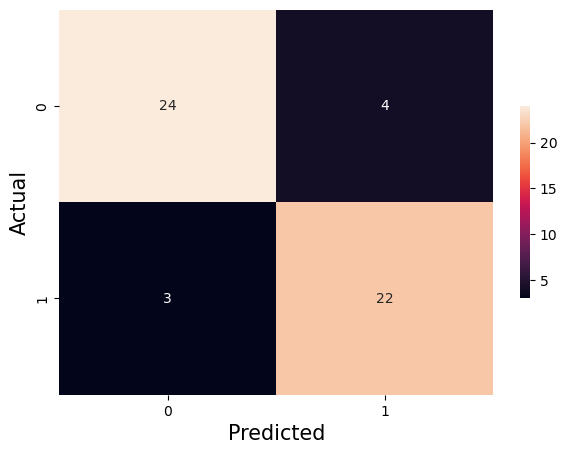

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

RF = RandomForestClassifier(random_state=42)
RF.fit(X_train_std, y_train)
y_pred_rf = RF.predict(X_test_std)

conf_matrix(y_test, y_pred_rf)

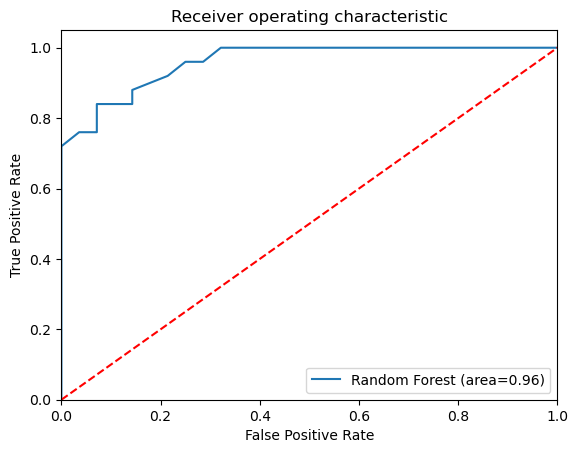

In [20]:
plot_roc_auc(RF, X_test_std, y_test, label='Random Forest (area=%0.2f)')

## 3. Model after Feature Extraction

Selected feature engineering algorithm: RFECV

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains, hence its name.

In [21]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(random_state=42)
min_features_to_select = 30
cv = StratifiedKFold(5)
step = 10

rfecv = RFECV(
    estimator=clf,
    step=step,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

rfecv.fit(X_train_std, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(random_state=42), min_features_to_select=30,
      n_jobs=2, scoring='accuracy', step=10)

In [22]:
print(f"Optimal number of features: {rfecv.n_features_}")

mask = rfecv.get_support()
features = np.array(X_train_std.columns)
best_features = features[mask]

print("Selected features: ", best_features.shape[0])
print(features[mask]) 

Optimal number of features: 70
Selected features:  70
['pressure_mean1' 'mean_acc_in_air2' 'mean_jerk_in_air2'
 'mean_jerk_on_paper3' 'mean_speed_in_air3' 'air_time4' 'pressure_var5'
 'air_time6' 'disp_index6' 'pressure_mean6' 'total_time6' 'disp_index7'
 'gmrt_in_air7' 'mean_gmrt7' 'mean_speed_in_air7' 'paper_time7'
 'pressure_var7' 'air_time8' 'disp_index8' 'mean_jerk_on_paper8'
 'total_time8' 'air_time9' 'mean_jerk_on_paper9' 'num_of_pendown9'
 'paper_time9' 'total_time9' 'mean_jerk_in_air10' 'air_time11'
 'mean_jerk_in_air11' 'total_time11' 'paper_time12' 'pressure_mean12'
 'total_time12' 'disp_index13' 'mean_acc_in_air13' 'mean_jerk_in_air13'
 'paper_time13' 'pressure_var13' 'total_time13' 'num_of_pendown14'
 'air_time15' 'max_x_extension15' 'mean_jerk_on_paper15' 'total_time15'
 'air_time16' 'air_time19' 'mean_speed_in_air19' 'num_of_pendown19'
 'pressure_mean19' 'pressure_var19' 'total_time19' 'gmrt_in_air20'
 'max_y_extension20' 'paper_time20' 'total_time20' 'max_x_extension21'

In [23]:
X_train_fr = X_train_std[features[mask]]
X_test_fr = X_test_std[features[mask]]
X_train_fr

,pressure_mean1,mean_acc_in_air2,mean_jerk_in_air2,mean_jerk_on_paper3,mean_speed_in_air3,air_time4,pressure_var5,air_time6,disp_index6,pressure_mean6,...,mean_acc_in_air22,mean_jerk_in_air22,gmrt_in_air23,max_x_extension23,mean_speed_in_air23,air_time24,mean_acc_on_paper24,mean_jerk_on_paper24,total_time24,max_y_extension25
0,0.690699,-0.094462,-0.075383,0.110403,-0.597118,-0.268996,2.588502,-0.110950,-0.091411,-0.037928,...,0.493249,0.429776,-1.802655,0.235614,-1.794244,6.842890,-0.717579,-0.445794,6.532278,-0.575960
1,0.635349,0.008221,0.052244,1.701381,0.752074,-0.160164,2.399298,1.279603,2.157764,0.557101,...,-0.175103,-0.073039,0.291987,0.979368,0.387129,-0.795918,-0.313413,-0.103740,-0.845879,0.794833
2,-0.804389,-0.199408,-0.154796,-0.961908,-0.323425,-0.274824,-0.280267,0.658741,1.046726,0.406651,...,-0.378553,-0.319069,-0.239173,0.030812,-0.206715,-0.522203,-1.536017,-1.319326,-0.432910,1.542104
3,-2.338458,-0.075176,-0.057518,1.796019,0.440002,-0.070704,-0.347970,5.943165,0.455076,-2.277229,...,0.855344,0.713578,0.153409,-0.214412,0.232200,0.658154,0.437717,0.525302,0.630194,0.596548
4,0.699303,-0.492934,-0.711617,-0.744598,-1.012180,0.012298,-0.821030,-0.578928,-0.213354,0.891248,...,-0.487430,-0.358903,-0.391362,-0.068895,-0.277956,-0.464165,1.663193,1.323886,-0.549120,-1.352376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.460199,2.011018,2.041830,-0.772207,1.617561,0.017495,-0.595313,0.065860,-0.263035,-0.088153,...,-0.507153,-0.474144,-1.707716,-0.698122,-1.692095,0.177499,0.681555,0.920863,0.092848,-0.947684
117,-2.234733,-0.566307,-0.603883,-0.324785,-1.064526,-0.238914,0.369739,-0.595554,-0.416593,0.011260,...,-0.422714,-0.372695,0.868554,-0.598416,0.809373,-0.471280,0.252008,0.227646,-0.455203,0.614227
118,-1.369292,0.214815,0.237702,-0.445019,-1.147290,-0.113702,3.356297,-0.050120,-0.213354,-3.083848,...,-0.698662,-0.450605,-1.561536,0.092791,-1.533968,1.393053,0.041444,-0.299258,1.571349,0.643372
119,-0.354071,-0.504866,-0.711175,-0.186634,-0.902395,-0.273879,-0.605652,-0.350211,-0.407560,0.316894,...,0.005437,0.279399,-0.736872,0.021380,-0.751872,-0.458798,0.453919,0.608189,-0.496588,0.387752


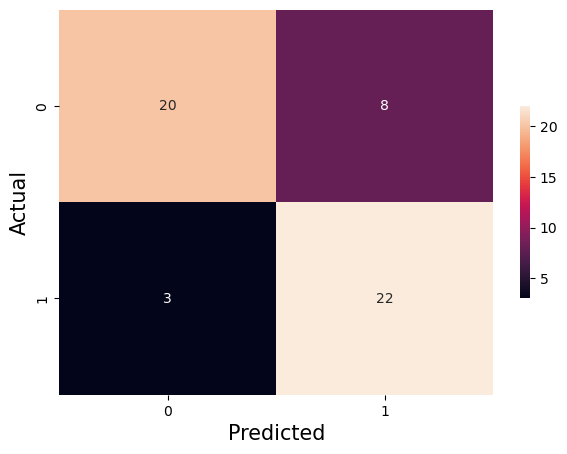

In [24]:
RF_rfecv = RandomForestClassifier(random_state=42)

RF_rfecv.fit(X_train_fr, y_train)
y_pred_RFECV = RF_rfecv.predict(X_test_fr)

conf_matrix(y_test, y_pred_RFECV)

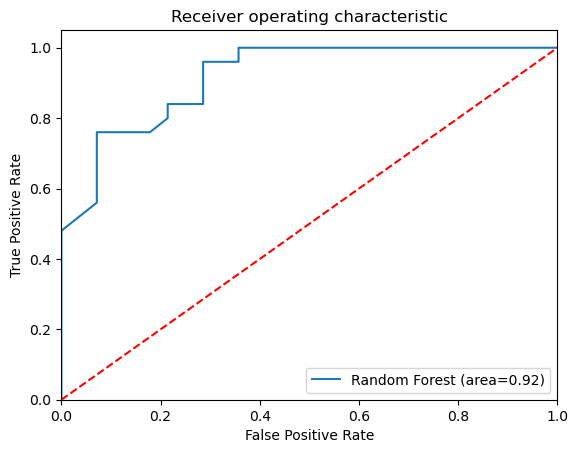

In [25]:
plot_roc_auc(RF_rfecv, X_test_fr, y_test, label='Random Forest (area=%0.2f)')

The fact that the prediction accuracy decreased a little with more false positive value is probably because the recursive feature elimination with cross validation removed some of the differentiating features along with the non-differentiating ones. A validation dataset would be helpful to determine whether my model has been overfitted with the patterns in the original data obtained from the same study.

Feature elimination is significant in that the number of features reduced to 70 and saved much of the computing power while maintaining the accuracy of 90%+. 